In [1]:
"------for the data--------------"
import pandas as pd
df=pd.read_csv('titanic_all_numeric.csv')


predictors=df.drop('survived',axis=1).values


from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)
n_cols=predictors.shape[1]

input_shape = (n_cols,)
"---------------------------------"


Using TensorFlow backend.


'---------------------------------'

In [2]:
# Important modules
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)


"for model_1 "
"---------------------------------------------"
"---------------------------------------------"
model_1=Sequential()
model_1.add(Dense(50, activation='relu', input_shape = input_shape))
# Add the output layer
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
"------------------------------------------------"
#print(model_1.count_params())   # just for checking
"------------------------------------------------"


'------------------------------------------------'

In [4]:
# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50,activation='relu',input_shape=input_shape))
model_2.add(Dense(50,activation='relu'))
model_2.add(Dense(50,activation='relu'))


# Add the output layer
model_2.add(Dense(2,activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










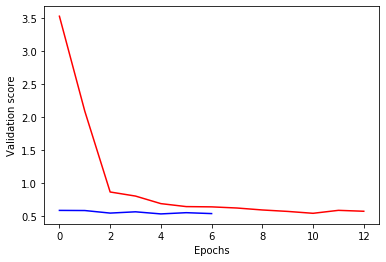

In [5]:

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

# Conclusion:

- The blue model is the one which is made by more deep layers. Whereas, red model is made with uni layer and fewer nodes. 
- The model with the lower loss value is the better model (blue in this case)